In [8]:
import numpy as np
import pandas as pd
from copy import deepcopy
k=2
import random as rd


In [2]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 2.6 MB/s eta 0:00:005.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3

In [1]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

In [10]:
X = pd.read_csv('/home/exam/Documents/soni.csv')
print(X)

    X1   X2
0  3.2  5.9
1  2.9  4.6
2  2.8  6.2
3  3.2  4.7
4  4.2  5.5
5  3.0  5.0
6  3.1  4.9
7  3.1  6.7
8  3.8  5.1
9  3.0  6.0


In [14]:
#ERROR PLT NOT FOUND
import matplotlib.pyplot as plt

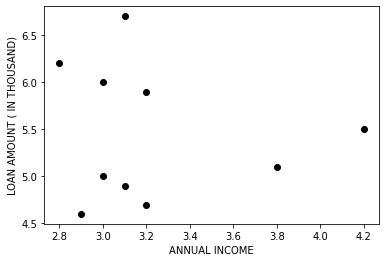

In [15]:
X=X[["X1","X2"]]
#VISUALISE DATA POINTS
plt.scatter(X["X1"],X["X2"],c='black')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('LOAN AMOUNT ( IN THOUSAND)')
plt.show()

In [16]:
x1 = X['X1'].values
x2 = X['X2'].values

In [17]:
x1

array([3.2, 2.9, 2.8, 3.2, 4.2, 3. , 3.1, 3.1, 3.8, 3. ])

In [18]:
x2

array([5.9, 4.6, 6.2, 4.7, 5.5, 5. , 4.9, 6.7, 5.1, 6. ])

In [20]:
#ERROR NP NOT FOUND
import numpy as np

In [21]:
X = np.array(list(zip(x1,x2)))
print(X)

[[3.2 5.9]
 [2.9 4.6]
 [2.8 6.2]
 [3.2 4.7]
 [4.2 5.5]
 [3.  5. ]
 [3.1 4.9]
 [3.1 6.7]
 [3.8 5.1]
 [3.  6. ]]


In [22]:
C_y = [6.2, 6.6 , 6.5]
C_x = [3.2, 3.7 ,3.0]

In [23]:
Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(Centroid.shape)

Initial Centroids
(3, 2)


In [25]:
Centroid

array([[3.2, 6.2],
       [3.7, 6.6],
       [3. , 6.5]], dtype=float32)

In [26]:
type(Centroid)

numpy.ndarray

In [27]:
Centroid_old = np.zeros(Centroid.shape)
print(Centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [29]:
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
[0,1,2,0,0,1,2,1,1,0]

[0, 1, 2, 0, 0, 1, 2, 1, 1, 0]

In [33]:
def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [34]:
error = euclidean(Centroid, Centroid_old,None)
print(error)

12.537144692236463


In [35]:
iterr = 0

In [41]:
while error != 0:
        # Assigning each value to its closest cluster
        iterr = iterr + 1
        for i in range(len(X)):
            #print("Data Points")
            #print(X[i])
            distances = euclidean(X[i], Centroid)
            #print("Distances")
            #print(distances)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        Centroid_old = deepcopy(Centroid)
        print("Old Centroid")
        print(Centroid_old)
            
        
        # Finding the new centroids by taking the Mean
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            Centroid[p] = np.mean(points, axis=0)
        print(" New Centroids after ", iterr," Iteration \n", Centroid)
        error = euclidean(Centroid, Centroid_old, None)
        print("Error ... ",error)
        print("Data points belong to which cluster")
        print(clusters)
        print("********************************************************")

Old Centroid
[[3.2 6.2]
 [3.7 6.6]
 [3.  6.5]]
 New Centroids after  3  Iteration 
 [[3.1714287 5.1714287]
 [4.2       5.5      ]
 [3.        6.5      ]]
Error ...  1.5870647
Data points belong to which cluster
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
********************************************************
Old Centroid
[[3.1714287 5.1714287]
 [4.2       5.5      ]
 [3.        6.5      ]]
 New Centroids after  4  Iteration 
 [[3.05 4.8 ]
 [4.   5.3 ]
 [3.   6.5 ]]
Error ...  0.48239395
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
Old Centroid
[[3.05 4.8 ]
 [4.   5.3 ]
 [3.   6.5 ]]
 New Centroids after  5  Iteration 
 [[3.05 4.8 ]
 [4.   5.3 ]
 [3.   6.5 ]]
Error ...  0.0
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
